The following sentence is needed to be able to import the `unnet` library from this notebook. So, It's not usually needed if you install the `unnet` library

In [16]:
import sys

sys.path.append('../')  # to be able to use the unnet library

Let's take a look at the individual artificial neuron, performing a forward pass through the inputs

In [ ]:
from unnet.nn import Neuron

neuron1 = Neuron(weights=[0.7, 0.8], bias=0.5)
result = neuron1([2.0, 3.0])
print(result)

Let's draw the resulting neuron, represented as a graph in which the nodes can be inputs, weights and the neuron bias. The last node will have the resulting value of the forward propagation.

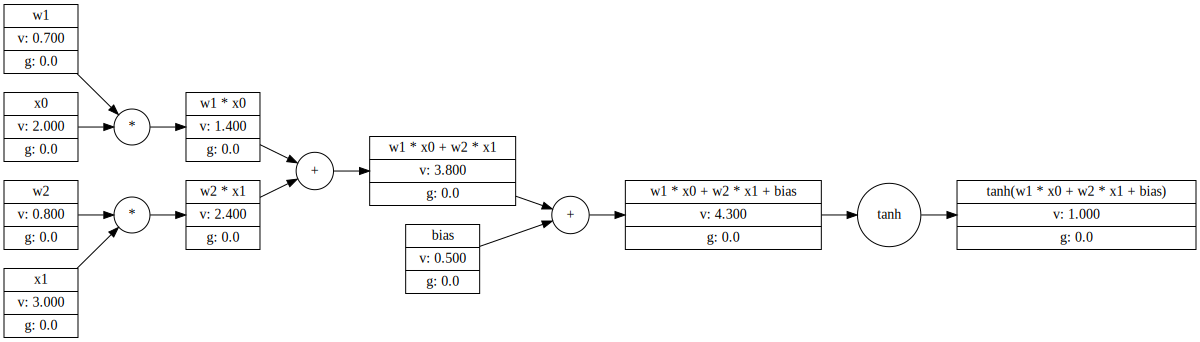

In [18]:
from unnet.utils import draw

draw(result)

We can also get a random neuron using the `Neuron.rand_neuron()` class method, which returns a neuron with random weights between `-1.0` and `1.0`

In [ ]:
from unnet.nn import Neuron

neuron = Neuron.rand_neuron(2)
result = neuron([2.0, 3.0])
print(result)

Let's now create a simple neural network with 2 layers of 2 neurons each

In [20]:
from unnet.nn import Layer, Network

layer1 = Layer.rand_layer(num_neurons=2, num_inputs=2)
layer2 = Layer.rand_layer(num_neurons=2, num_inputs=2)
network = Network([layer1, layer2])
print(f'network: {network}')
print(f'network layers: {network.layers}')

network: Network(num_layers=2)
network layers: [Layer(neurons=Neuron(num_inputs=2), Neuron(num_inputs=2)), Layer(neurons=Neuron(num_inputs=2), Neuron(num_inputs=2))]


In [ ]:
result = network([2.0, 3.0])
print(result)

Now let's backpropagate the result

In [22]:
result.backward()

And draw the network

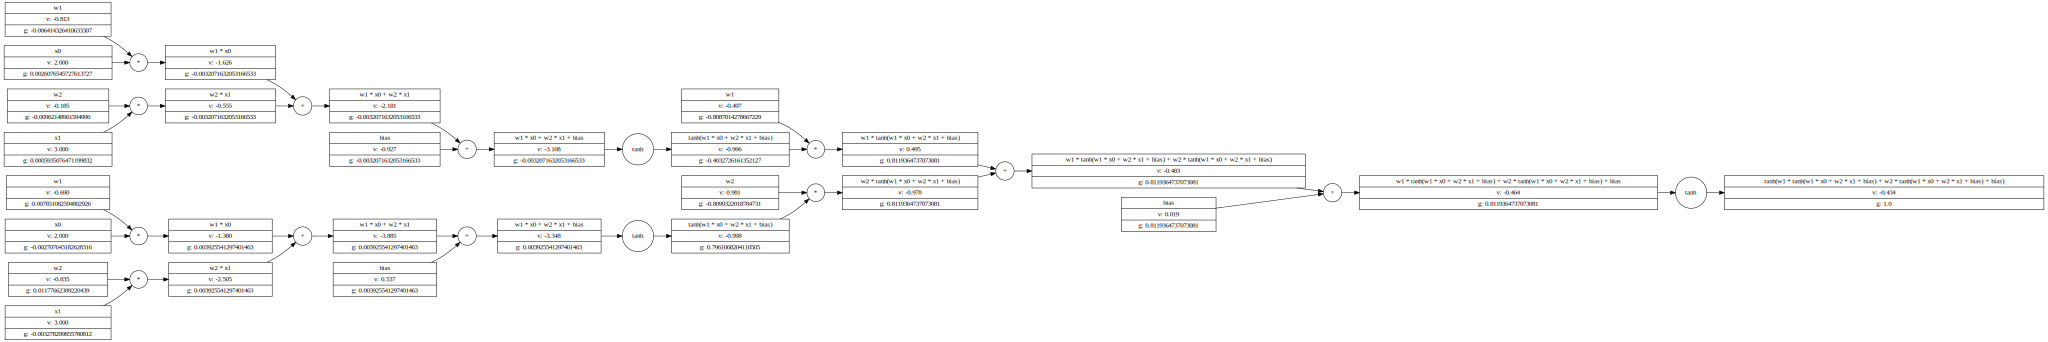

In [23]:
draw(result)

Let's now train a neural network to solve a simple math problem: chosing the minium number out of tree

In [24]:
# training a neural network to choose the minimum of three numbers
xs = [
    [3.0, 2.0, -1.0],
    [1.0, 0.0, -0.5],
    [0.5, 2.0, 1.0],
    [1.0, 1.0, 0.0],
    [1.0, 2.0, 3.0],
    [0.0, 1.0, 0.0],
]  # inputs
ys = [-1.0, -0.5, 0.5, 0.0, 1.0, 0.0]  # targets (minimum number of each input)
# neural network with 3 inputs, 3 hidden neurons, and 1 output neuron
network = Network.create(3, [3, 1])

loss_list = list(network.train_gen(training_data=xs, desired_output=ys, steps=2000))
for loss in loss_list:
    print(loss)  # print loss for each step

2.08184706991061
3.9825350472588443
0.5767388186032751
0.4436390981582427
0.3729154232408317
0.33014708853179614
0.30138412556631383
0.2797804212188781
0.26200698266349776
0.2465524128590028
0.2327327740487011
0.22020463208125696
0.20875569565200724
0.19822493632279628
0.18847594225371664
0.17939002833460013
0.1708657589115047
0.16281995421041798
0.1551883897163675
0.14792551939099707
0.14100294531275523
0.13440658544442363
0.12813273409489812
0.12218348939666135
0.11656224009432287
0.11126994371354619
0.1063027317786136
0.10165101352621018
0.09729987218290129
0.09323030639530609
0.08942081969785193
0.08584896147466267
0.08249258534354353
0.07933074069703294
0.07634421390858562
0.07351578547800912
0.07083028214359621
0.06827449556467274
0.06583702381826868
0.06350807595452579
0.06127926624421315
0.059143414495515884
0.05709436155846188
0.055126804352901085
0.05323615170894747
0.05141840053148585
0.049670030806384824
0.04798791752072037
0.04636925742189985
0.04481150859018443
0.04331234

Now let's check the output of the trained network with some inputs:

In [ ]:
print(network([3.0, 2.0, -1.0]).value)
print(network([1.0, 0.0, -0.5]).value)

Probably the above results are not exactly the expected minimum number. Remember that neural networks deal with probabilities, so given the data that we fed the network with, it calculates a close approximation to the minimum number.